In [1]:
import numpy as np
import pandas as pd

#Plot
import matplotlib.pyplot as plt
#Plot styling
import seaborn as sns; sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#Classifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Assess the model
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [2]:
#The function that convert 0 to NaN
def zero2NAN(col):
    n=-1
    for i in col:
        n+=1
        if i == int('0'):
            col[n]= np.nan

# See the how the data distributes

In [3]:
#Load the data
dataset = pd.read_table('./糖尿病-分类数据/data.txt')

In [4]:
#How the data looks
dataset.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Number of times pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Diastolic blood pressure (mm Hg),768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Triceps skin fold thickness (mm),768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
2-Hour serum insulin (mu U/ml),768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Body mass index (weight in kg/(height in m)^2),768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes pedigree function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age (years),768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class variable (0 or 1),768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Fill the NA
### See the number of NA

In [6]:
(dataset.iloc[:,[1,2,3,4,5]] == 0).astype(int).sum(axis=0)

Plasma glucose concentration a 2 hours in an oral glucose tolerance test      5
Diastolic blood pressure (mm Hg)                                             35
Triceps skin fold thickness (mm)                                            227
2-Hour serum insulin (mu U/ml)                                              374
Body mass index (weight in kg/(height in m)^2)                               11
dtype: int64

### Fill NA with median

In [7]:
zero2NAN(dataset.iloc[:,1])
zero2NAN(dataset.iloc[:,2])
zero2NAN(dataset.iloc[:,3])
zero2NAN(dataset.iloc[:,4])
zero2NAN(dataset.iloc[:,5])

In [8]:
dataset.iloc[:,1] = (dataset.iloc[:,1]).fillna((dataset.iloc[:,1]).mean())
dataset.iloc[:,2] = (dataset.iloc[:,2]).fillna((dataset.iloc[:,2]).mean())
dataset.iloc[:,3] = (dataset.iloc[:,3]).fillna((dataset.iloc[:,3]).mean())
dataset.iloc[:,4] = (dataset.iloc[:,4]).fillna((dataset.iloc[:,4]).mean())
dataset.iloc[:,5] = (dataset.iloc[:,5]).fillna((dataset.iloc[:,5]).mean())

# Divide the dataset into training set and test set

In [9]:
input = np.array(dataset.iloc[:,[0,1,2,3,4,5,6,7]].values)
target = np.array(dataset.iloc[:,[8]])

In [10]:
input_train, input_test, target_train, target_test = train_test_split(input, target, test_size = 0.3)

## ``SVM classifier``
Computing the (soft-margin) SVM classifier amounts to minimizing an expression of the form
$$
\left[\frac{1}{n} \sum_{i=1}^{n} \max \left(0,1-y_{i}\left(w \cdot x_{i}-b\right)\right)\right]+\lambda\|w\|^{2}
$$

In [11]:
SVM=SVC(gamma="auto", kernel="linear", probability=True)
SVM_model = SVM.fit(input_train,target_train)
SVM_fit = SVM_model.predict_proba(input_train)[...,1]
SVM_pre = SVM_model.predict(input_test)
SVM_score = SVM.score(input_test,target_test)

SVM_f1 = f1_score(target_test, SVM_pre)
SVM_recall = recall_score(target_test, SVM_pre)
SVM_accuracy = accuracy_score(target_test, SVM_pre)
SVM_precision = precision_score(target_test, SVM_pre)
SVM_fpr, SVM_tpr, SVM_threshold = roc_curve(target_train, SVM_fit)
SVM_roc_auc = auc(SVM_fpr,SVM_tpr)

## ``KNN classifier``
Suppose we have pairs $\left(X_{1}, Y_{1}\right),\left(X_{2}, Y_{2}\right), \ldots,\left(X_{n}, Y_{n}\right)$ taking values in $\mathbb{R}^{d} \times\{1,2\},$ where $Y$ is the class label of $X,$ so that $X | Y=r \sim P_{r}$ for $r=1,2$ (and probability distributions $P_{r}$ ). Given some norm $\|\cdot\|$ on $\mathbb{R}^{d}$ and a point $x \in \mathbb{R}^{d},$ let $\left(X_{(1)}, Y_{(1)}\right), \ldots,\left(X_{(n)}, Y_{(n)}\right)$ be a reordering of the training data such that $\left\|X_{(1)}-x\right\| \leq \cdots \leq\left\|X_{(n)}-x\right\|$.

The training examples are vectors in a multidimensional feature space, each with a class label. The training phase of the algorithm consists only of storing the feature vectors and class labels of the training samples.

In the classification phase, k is a user-defined constant, and an unlabeled vector (a query or test point) is classified by assigning the label which is most frequent among the k training samples nearest to that query point.

In [12]:
KNN = KNeighborsClassifier(5)
KNN_model = KNN.fit(input_train, target_train)
KNN_fit = KNN_model.predict_proba(input_train)[...,1]
KNN_pre = KNN_model.predict(input_test)
KNN_score = KNN.score(input_test,target_test)
KNN_f1 = f1_score(target_test, KNN_pre)
KNN_recall = recall_score(target_test, KNN_pre)
KNN_accuracy = accuracy_score(target_test, KNN_pre)
KNN_precision = precision_score(target_test, KNN_pre)
KNN_fpr, KNN_tpr, KNN_threshold = roc_curve(target_train, KNN_fit)
KNN_roc_auc = auc(KNN_fpr, KNN_tpr)

## ``Gradient boosting classifier``
### Input
Training set $\left\{\left(x_{i}, y_{i}\right)\right\}_{i-1}^{n},$ a differentiable loss function $L(y, F(x)),$ number of iterations $M$

### Agorithm
- Intialize model with a constant value:
$$
F_{0}(x)=\arg \min _{\gamma} \sum_{i=1}^{n} L\left(y_{i}, \gamma\right)
$$
- For $m=1$ to $M$
    - Compute the pseudo-residuals: $r_{i m}=-\left[\frac{\partial L\left(y_{i}, F\left(x_{i}\right)\right)}{\partial F\left(x_{i}\right)}\right]_{F(x)=F_{m-1}(x)} \text { for } i=1, \ldots, n$
    - Fit a base learner (or weak learner, e.g. tree) $h_{m}(x)$ to pseudo-residuals, i.e. train it using the training set $\left\{\left(x_{i}, r_{i m}\right)\right\}_{j=1}^{n}$
    - Compute multiplier $\gamma_{m}$ by solving the following one-dimensional optimization problem: $\gamma_{m}=\arg \min _{\gamma} \sum_{i=1}^{n} L\left(y_{i}, F_{m-1}\left(x_{i}\right)+\gamma h_{m}\left(x_{i}\right)\right)$
    - Update the model: $F_{n(x)=F_{n-1}(x)+\gamma_{n} h_{m}(x)}$
- Output $F_{M}(x)$



In [13]:
GBC = GradientBoostingClassifier()
GBC_model = GBC.fit(input_train, target_train)
GBC_fit = GBC_model.predict_proba(input_train)[...,1]
GBC_pre = GBC_model.predict(input_test)
GBC_score= GBC.score(input_test, target_test)

GBC_f1 = f1_score(target_test, GBC_pre)
GBC_recall = recall_score(target_test, GBC_pre)
GBC_accuracy = accuracy_score(target_test, GBC_pre)
GBC_precision = precision_score(target_test, GBC_pre)
GBC_fpr, GBC_tpr, GBC_threshold = roc_curve(target_train, GBC_fit)
GBC_roc_auc = auc(GBC_fpr, GBC_tpr)

# Compare the output of different methods
- $accuracy\ =\frac{T P+T N}{T P+T N+F P+F N}$
- $precision=\frac{T P}{T P+F P}$
- $\ \ \ recall\ \ \ =\frac{T P}{T P+F N}$
- $f_{1}=\left(\frac{2}{\text { recall }^{-1}+\text {precision }^{-1}}\right)=2 \cdot \frac{\text { precision } \cdot \text { recall }}{\text { precision }+\text { recall }}$


In [14]:
out = pd.DataFrame([[SVM_f1, SVM_accuracy, SVM_precision, SVM_recall, SVM_roc_auc], [KNN_f1, KNN_accuracy, KNN_precision, KNN_recall, KNN_roc_auc], [GBC_f1, GBC_accuracy, GBC_precision, GBC_recall, GBC_roc_auc]], columns = ['f1', 'accuracy', 'precision', 'recall', 'AUC'], index = ['SVM', 'KNN', 'GBC'])
out

,f1,accuracy,precision,recall,AUC
SVM,0.642857,0.783550,0.750000,0.5625,0.839465
KNN,0.517483,0.701299,0.587302,0.4625,0.888679
GBC,0.641026,0.757576,0.657895,0.6250,0.986832


# Plot

Text(0, 0.5, 'TPR')

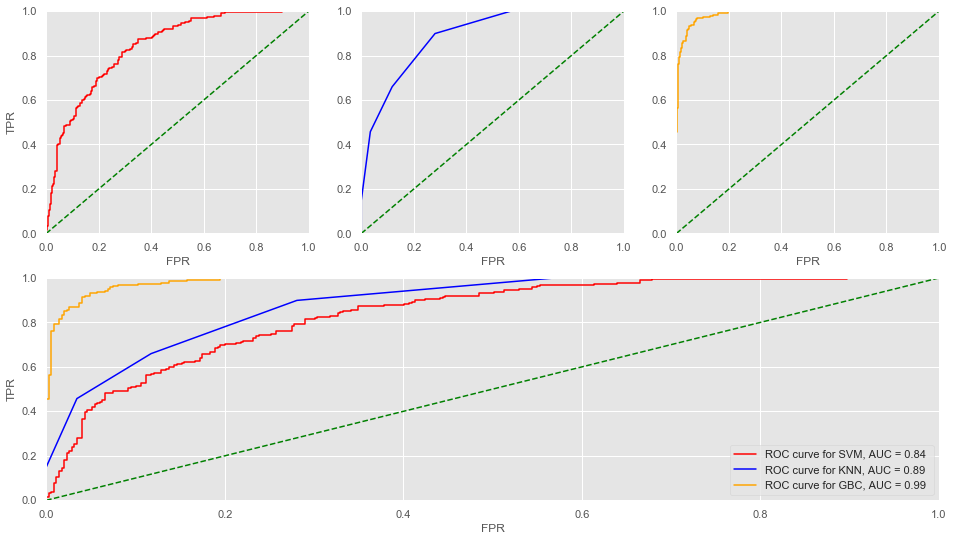

In [15]:
plt.subplot(231)
plt.plot(SVM_fpr, SVM_tpr, color="red", label="ROC curve for SVM")
plt.plot([0,1], [0,1], color="green", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.subplot(232)
plt.plot(KNN_fpr, KNN_tpr, color="blue", label="ROC curve for KNN")
plt.plot([0,1], [0,1], color="green", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("FPR")
plt.subplot(233)
plt.plot(GBC_fpr, GBC_tpr, color="orange", label="ROC curve for GBC")
plt.plot([0,1], [0,1], color="green", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("FPR")

plt.subplot(212)
plt.plot(SVM_fpr, SVM_tpr, color="red", label="ROC curve for SVM, AUC = %.2f " % SVM_roc_auc)
plt.plot(KNN_fpr, KNN_tpr, color="blue", label="ROC curve for KNN, AUC = %.2f " % KNN_roc_auc)
plt.plot(GBC_fpr, GBC_tpr, color="orange", label="ROC curve for GBC, AUC = %.2f " % GBC_roc_auc)
plt.legend(loc='downer right')

plt.plot([0,1], [0,1], color="green", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")